In [1]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

IOStream.flush timed out


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D, Flatten
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
%%time
data = []
for files in os.listdir("./train"):
    im = cv.resize(cv.imread(os.path.join('train/',files)),(100,100))
    grey = cv.cvtColor(im,cv.COLOR_RGB2GRAY)
    # print(grey.shape, im.shape)
    label = files.split('.')[0]
    if label=='cat':
        data.append([np.array(grey), np.array([0,1])])
    elif label=='dog':
        data.append([np.array(grey), np.array([1,0])]) 

CPU times: user 24.6 s, sys: 1.36 s, total: 25.9 s
Wall time: 32.2 s


In [4]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation ='relu', input_shape=(100,100,1), padding = 'same'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()


Metal device set to: Apple M1


2022-07-24 12:53:41.226570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-24 12:53:41.226915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        3

In [5]:
train, test = train_test_split(data, test_size=0.1, shuffle=True)

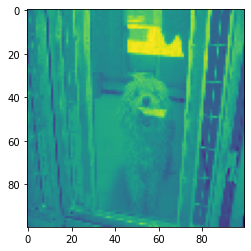

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0])

In [7]:
X = np.array([i[0] for i in train]).reshape(-1,100,100,1)
y = np.array([i[1] for i in train])

X_test = np.array([i[0] for i in test]).reshape(-1,100,100,1)
y_test = np.array([i[1] for i in test])

X = X.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X.shape,X_test.shape,y.shape,y_test.shape,type(X)

((22500, 100, 100, 1),
 (2500, 100, 100, 1),
 (22500, 2),
 (2500, 2),
 numpy.ndarray)

In [8]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
%%time
model.fit(X,y, batch_size=10, epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10


2022-07-24 12:54:12.015775: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-24 12:54:12.624407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2249/2250 [============================>.] - ETA: 0s - loss: 0.6673 - accuracy: 0.5796

2022-07-24 12:55:46.972985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2250/2250 [==============================] - 98s 42ms/step - loss: 0.6673 - accuracy: 0.5796 - val_loss: 0.6186 - val_accuracy: 0.6464
Epoch 2/10
2250/2250 [==============================] - 95s 42ms/step - loss: 0.5870 - accuracy: 0.6857 - val_loss: 0.5552 - val_accuracy: 0.7232
Epoch 3/10
2250/2250 [==============================] - 98s 44ms/step - loss: 0.4996 - accuracy: 0.7592 - val_loss: 0.5877 - val_accuracy: 0.7136
Epoch 4/10
2250/2250 [==============================] - 116s 52ms/step - loss: 0.4281 - accuracy: 0.8015 - val_loss: 0.4053 - val_accuracy: 0.8212
Epoch 5/10
2250/2250 [==============================] - 130s 58ms/step - loss: 0.3694 - accuracy: 0.8342 - val_loss: 0.3839 - val_accuracy: 0.8332
Epoch 6/10
2250/2250 [==============================] - 138s 61ms/step - loss: 0.3274 - accuracy: 0.8568 - val_loss: 0.3695 - val_accuracy: 0.8292
Epoch 7/10
2250/2250 [==============================] - 148s 66ms/step - loss: 0.2908 - accuracy: 0.8752 - val_loss: 0.3707 - val_ac